#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-14 10:41:09.578141


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
1,Austria,AUT,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-13,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349446...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-13,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://informesdeis.minsal.cl/SASVisualAnalyt...
7,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Oman,OMN,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://twitter.com/OmaniMOH/status/1349582771...
1,Bulgaria,BGR,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://coronavirus.bg/bg/statistika
2,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
3,Finland,FIN,Pfizer/BioNTech,2021-01-13,THL via Helsingin Sanomat,https://github.com/HS-Datadesk/koronavirus-avo...
4,Mexico,MEX,Pfizer/BioNTech,2021-01-13,Secretary of Health,https://www.gob.mx/salud/prensa/015-vacunacion...
5,Lithuania,LTU,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
6,Latvia,LVA,Pfizer/BioNTech,2021-01-13,National Health Service,http://www.vmnvd.gov.lv/lv/covid-19/1486-vakci...
7,Austria,AUT,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
8,Italy,ITA,Pfizer/BioNTech,2021-01-13,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
9,Israel,ISR,Pfizer/BioNTech,2021-01-13,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
55,Bulgaria,2021-01-14,Pfizer/BioNTech,https://coronavirus.bg/bg/statistika,17038,17038.0,0,BGR,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://coronavirus.bg/bg/statistika,both
358,Oman,2021-01-14,Pfizer/BioNTech,https://twitter.com/OmaniMOH/status/1349582771...,22749,22749.0,0,OMN,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://twitter.com/OmaniMOH/status/1349582771...,both
54,Bulgaria,2021-01-13,Pfizer/BioNTech,https://coronavirus.bg/bg/statistika,15780,15780.0,0,BGR,Pfizer/BioNTech,2021-01-14,Ministry of Health,https://coronavirus.bg/bg/statistika,both
97,China,2021-01-13,"CNBG, Sinovac",https://www.chinadaily.com.cn/a/202101/13/WS5f...,10000000,10000000.0,0,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...,both
151,Estonia,2021-01-13,Pfizer/BioNTech,https://www.terviseamet.ee/et/uudised/covid-19...,13481,13481.0,0,EST,Pfizer/BioNTech,2021-01-13,National Health Board,https://www.terviseamet.ee/et/uudised,both
34,Bahrain,2021-01-13,"Pfizer/BioNTech, Sinopharm",https://twitter.com/MOH_Bahrain/status/1349446...,101363,101363.0,0,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-13,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349446...,both
396,Romania,2021-01-13,Pfizer/BioNTech,https://vaccinare-covid.gov.ro/actualizare-zil...,154268,154268.0,0,ROU,Pfizer/BioNTech,2021-01-13,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,both
159,Finland,2021-01-13,Pfizer/BioNTech,https://github.com/HS-Datadesk/koronavirus-avo...,23126,23126.0,0,FIN,Pfizer/BioNTech,2021-01-13,THL via Helsingin Sanomat,https://github.com/HS-Datadesk/koronavirus-avo...,both
166,France,2021-01-13,Pfizer/BioNTech,https://www.data.gouv.fr/fr/datasets/donnees-r...,247167,247167.0,0,FRA,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.data.gouv.fr/fr/datasets/donnees-r...,both
373,Poland,2021-01-13,Pfizer/BioNTech,https://twitter.com/szczepimysie/status/134928...,309620,309620.0,0,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134928...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  31
Israel                  26
Bahrain                 22
Italy                   18
Romania                 17
Germany                 17
Denmark                 17
Greece                  17
Estonia                 16
Oman                    16
Lithuania               15
Mexico                  15
United States           15
Poland                  15
Norway                  14
Latvia                  13
Hungary                 12
Bulgaria                11
Belgium                 10
Slovenia                10
Finland                  8
United Arab Emirates     8
Netherlands              8
Austria                  8
Croatia                  7
Wales                    7
Spain                    7
France                   7
Scotland                 7
Northern Ireland         7
Chile                    7
Portugal                 6
United Kingdom           6
England                  6
Slovakia                 6
Argentina                5
China                    4
I

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                            
Argentina             Sputnik V                               5
Austria               Pfizer/BioNTech                         8
Bahrain               Pfizer/BioNTech, Sinopharm             22
Belgium               Pfizer/BioNTech                        10
Bulgaria              Pfizer/BioNTech                        11
Canada                Moderna, Pfizer/BioNTech               14
                      Pfizer/BioNTech                        17
Chile                 Pfizer/BioNTech                         7
China                 CNBG, Sinovac                           4
Costa Rica            Pfizer/BioNTech                         3
Croatia               Pfizer/BioNTech                         7
Cyprus                Pfizer/BioNTech                         2
Czechia               Pfizer/BioNTech                         3
Denmark               Pfizer/BioNTech                        17
England               Oxford/AstraZeneca, Pfiz

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 466
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 447 non-null    object        
 1   date                     447 non-null    datetime64[ns]
 2   vaccine                  447 non-null    object        
 3   source_url               447 non-null    object        
 4   total_vaccinations       447 non-null    int64         
 5   people_vaccinated        443 non-null    float64       
 6   people_fully_vaccinated  447 non-null    int64         
 7   iso_code                 447 non-null    object        
 8   vaccines                 447 non-null    object        
 9   last_observation_date    447 non-null    object        
 10  source_name              447 non-null    object        
 11  source_website           447 non-null    object        
 12  _merge                   447 non-nul

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


32 566 918 (48, 3)


## Charts

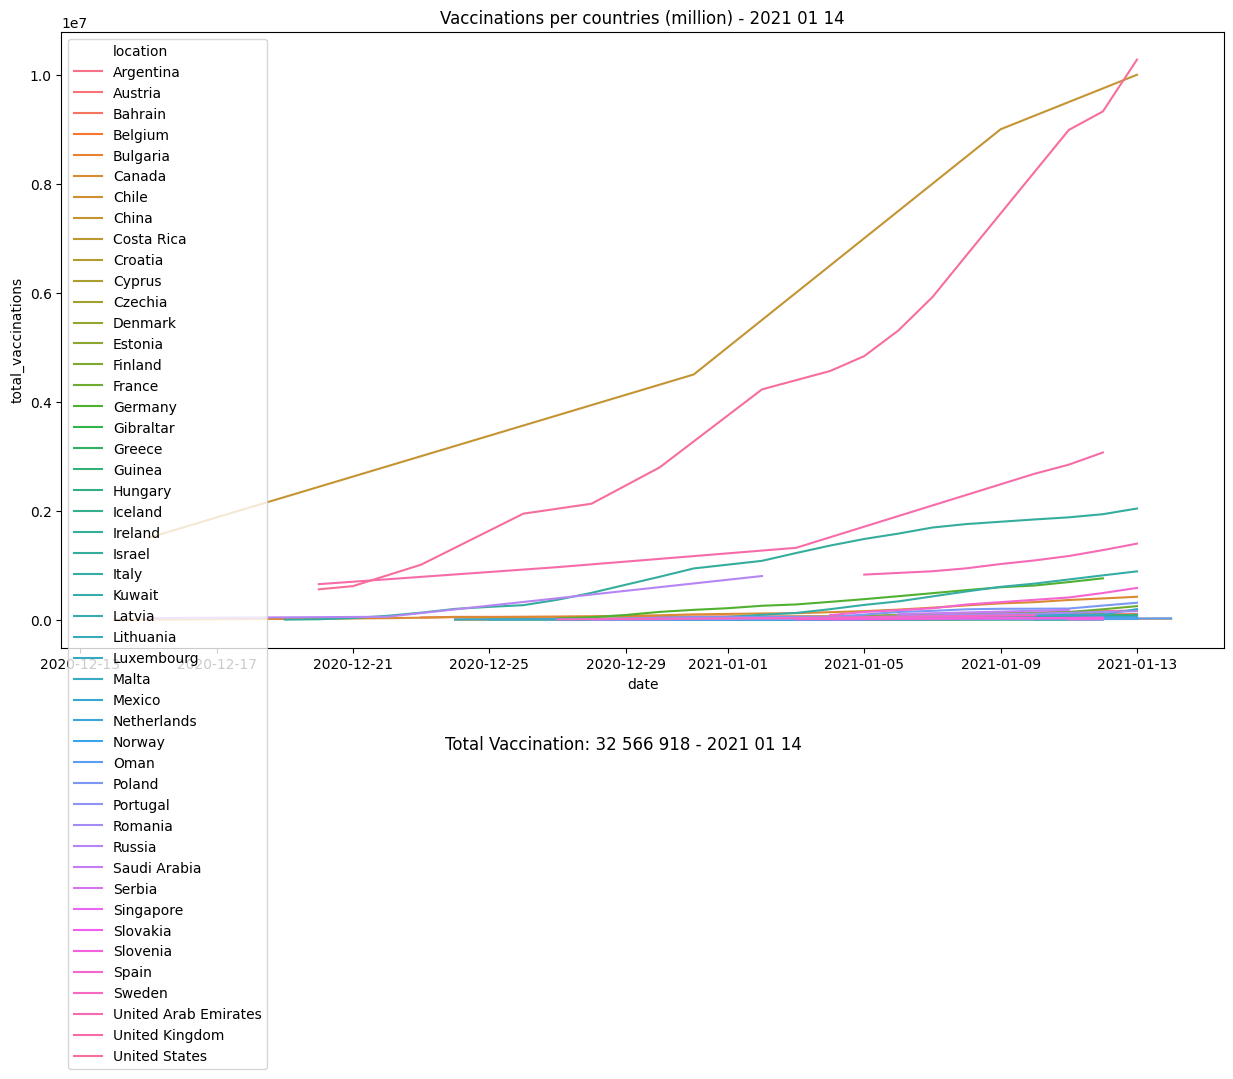

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 466
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 447 non-null    object        
 1   date                     447 non-null    datetime64[ns]
 2   vaccine                  447 non-null    object        
 3   source_url               447 non-null    object        
 4   total_vaccinations       447 non-null    int64         
 5   people_vaccinated        443 non-null    float64       
 6   people_fully_vaccinated  447 non-null    int64         
 7   iso_code                 447 non-null    object        
 8   vaccines                 447 non-null    object        
 9   last_observation_date    447 non-null    object        
 10  source_name              447 non-null    object        
 11  source_website           447 non-null    object        
 12  _merge                   447 non-nul

In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


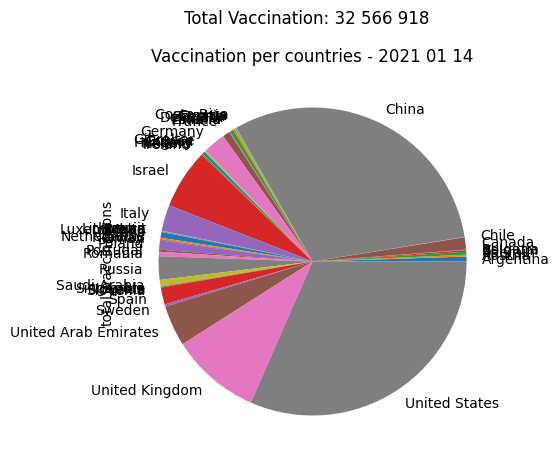

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,10278462,"Moderna, Pfizer/BioNTech",USA
China,10000000,"CNBG, Sinovac",CHN
United Kingdom,3067541,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Israel,2039031,Pfizer/BioNTech,ISR
United Arab Emirates,1394580,"Pfizer/BioNTech, Sinopharm",ARE
Italy,885814,Pfizer/BioNTech,ITA
Russia,800000,Sputnik V,RUS
Germany,758093,"Moderna, Pfizer/BioNTech",DEU
Spain,581638,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(48, 3)

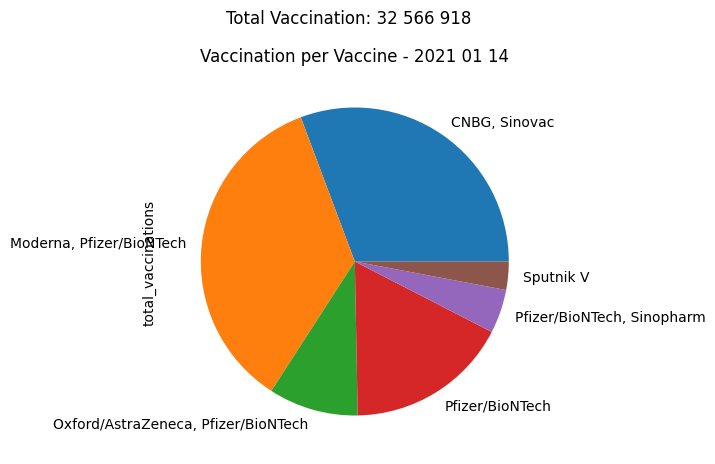

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                                966858
Pfizer/BioNTech, Sinopharm              1495943
Oxford/AstraZeneca, Pfizer/BioNTech     3067541
Pfizer/BioNTech                         5580812
CNBG, Sinovac                          10000000
Moderna, Pfizer/BioNTech               11455764
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 10:41:25.923648
Time elapsed (hh:mm:ss.ms) 0:00:16.345749


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
22,http://www.wikidata.org/entity/Q790,North America,false,Haiti,Q790,10981229,HTI,765,false,false,male
40,http://www.wikidata.org/entity/Q970,Africa,false,Comoros,Q970,823652,COM,1312,false,false,male
82,http://www.wikidata.org/entity/Q242,North America,false,Belize,Q242,374681,BLZ,4971,false,false,male
0,http://www.wikidata.org/entity/Q29,Europe,true,Spain,Q29,46733038,ESP,28208,false,false,male
52,http://www.wikidata.org/entity/Q17,Asia,false,Japan,Q17,126434565,JPN,38430,true,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,166833,Sputnik V,ARG
Austria,63280,Pfizer/BioNTech,AUT
Bahrain,101363,"Pfizer/BioNTech, Sinopharm",BHR
Belgium,53726,Pfizer/BioNTech,BEL
Bulgaria,17038,Pfizer/BioNTech,BGR
Canada,419209,"Moderna, Pfizer/BioNTech",CAN
Chile,10699,Pfizer/BioNTech,CHL
China,10000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,166833,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,63280,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,101363,"Pfizer/BioNTech, Sinopharm",BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,53726,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,17038,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,419209,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10699,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,10000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,34553,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   47 non-null     int64   
 1   vaccine              47 non-null     object  
 2   iso_code             47 non-null     object  
 3   cid                  47 non-null     object  
 4   continent            47 non-null     object  
 5   memberEU             47 non-null     int64   
 6   country              47 non-null     object  
 7   qid                  47 non-null     object  
 8   population           47 non-null     int64   
 9   ISO3166_1            47 non-null     object  
 10  nominalGDPperCapita  46 non-null     float64 
 11  G20                  47 non-null     int64   
 12  IMF                  47 non-null     int64   
 13  genderH              47 non-null     object  
 14  _merge               47 non-null     category
 15  genderFlag           47 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.309124
population                         0.804524
nominalGDPperCapita                0.060350
G20                                0.470216
IMF                               -0.005257
genderFlag                         0.111992
Country                            0.134835
vaccinations_population_percent    0.190048
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.190048
memberEU                          -0.274589
population                        -0.035615
nominalGDPperCapita                0.131498
G20                               -0.059353
IMF                               -0.042029
genderFlag                         0.082591
Country                            0.121032
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


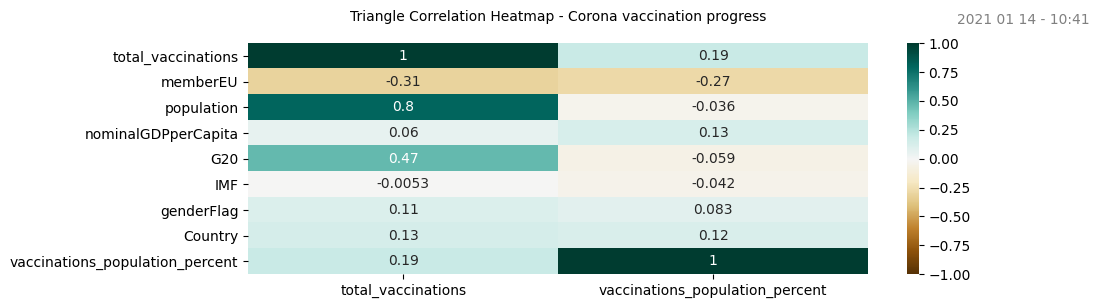

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,continent,total_vaccinations,memberEU,population,country,IMF,G20,vaccinations_population_percent
22,Asia,2039031,0,9093000,Israel,0,0,22.424183
44,Asia,1394580,0,9400145,United Arab Emirates,0,0,14.835729
2,Asia,101363,0,1492584,Bahrain,0,0,6.791109
45,Europe,3067541,0,66022273,United Kingdom,0,1,4.646221
46,North America,10278462,0,328239523,United States of America,0,1,3.131391
12,Europe,118073,1,5827463,Denmark,0,0,2.026148
23,Europe,885814,1,60317000,Italy,1,1,1.468598
20,Europe,4875,0,357050,Iceland,0,0,1.365355
42,Europe,581638,1,46733038,Spain,0,0,1.244597
41,Europe,24462,1,2066880,Slovenia,0,0,1.183523


## Vaccination numbers % of population

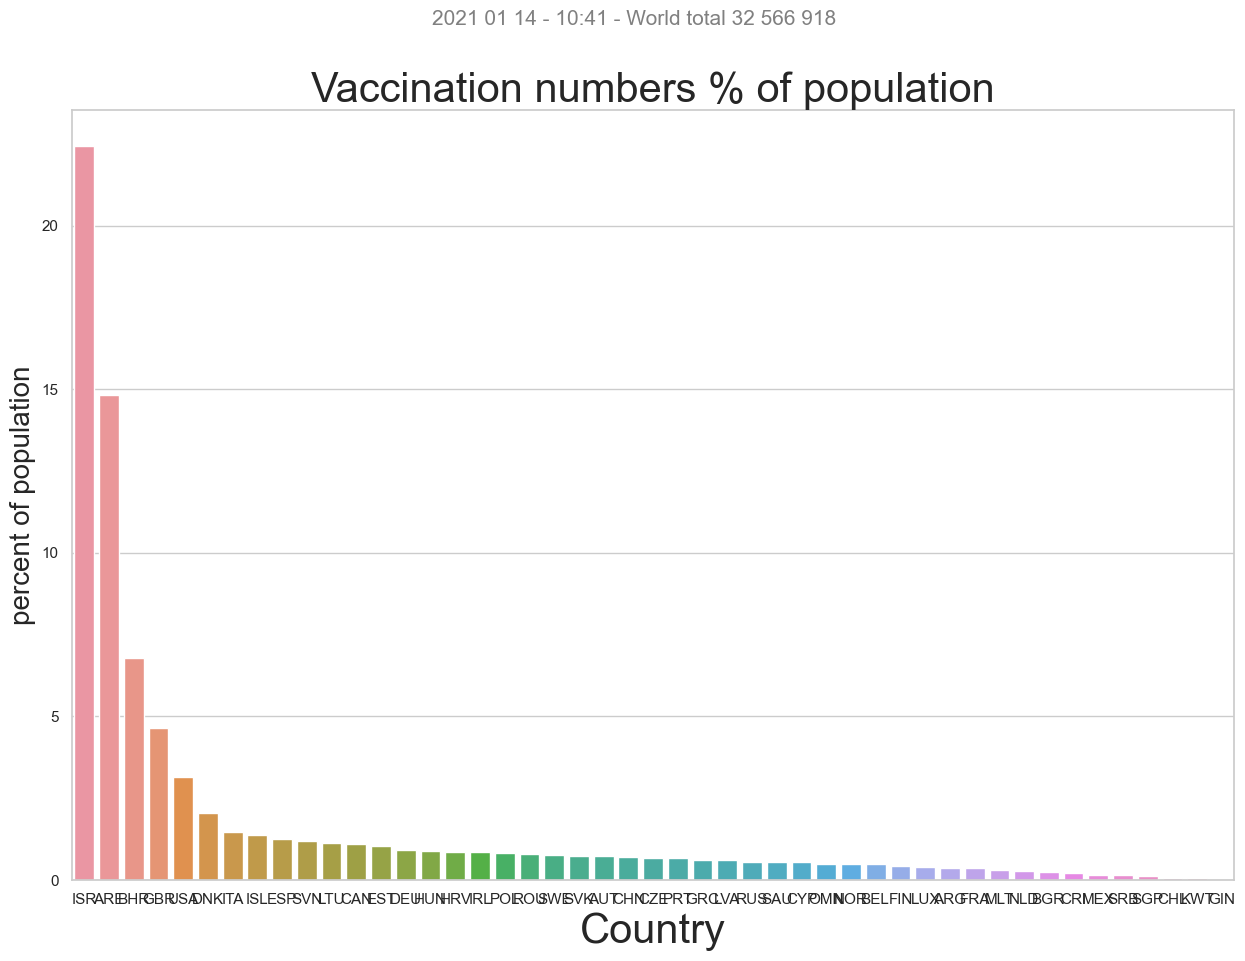

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

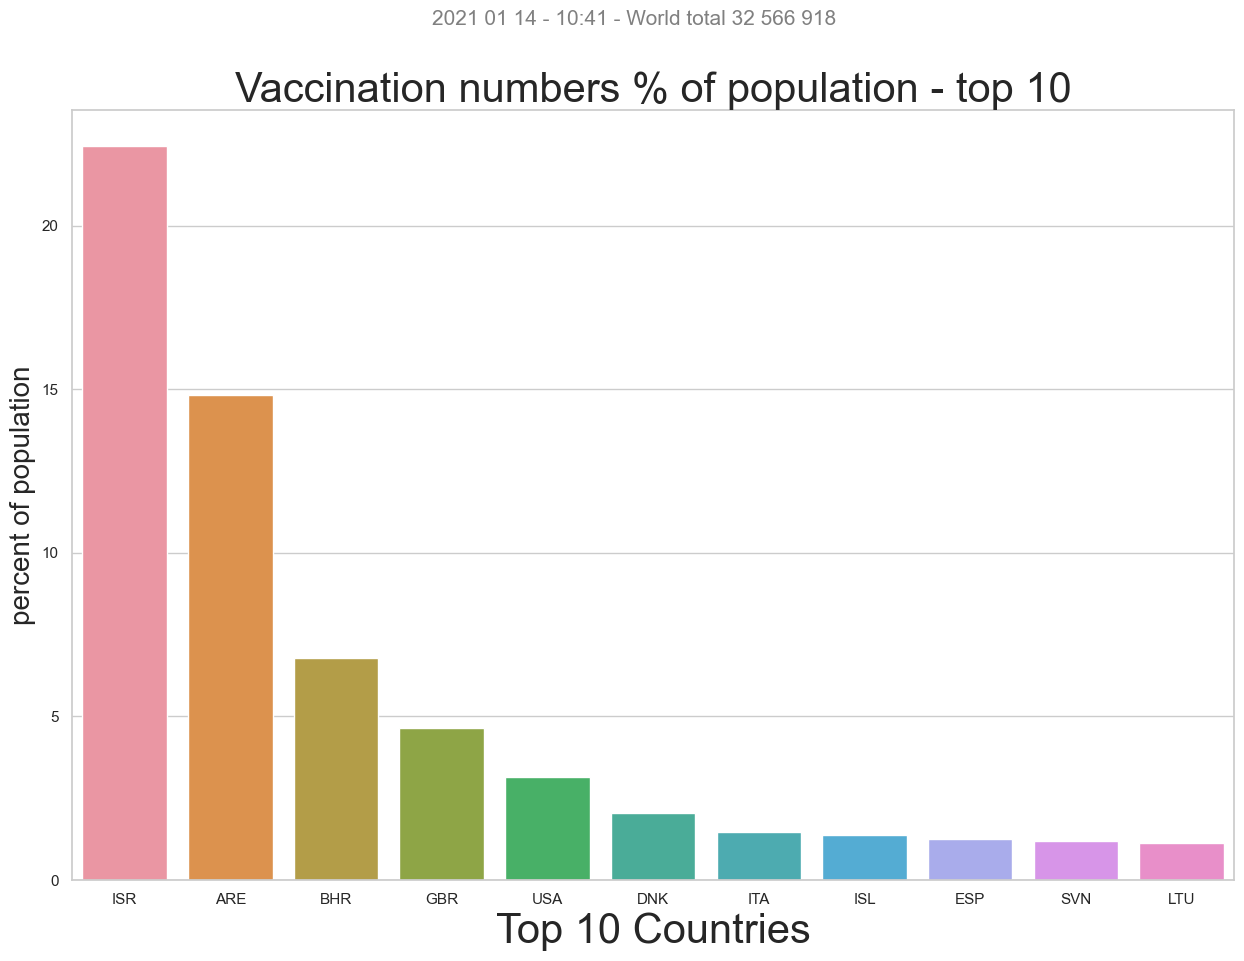

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

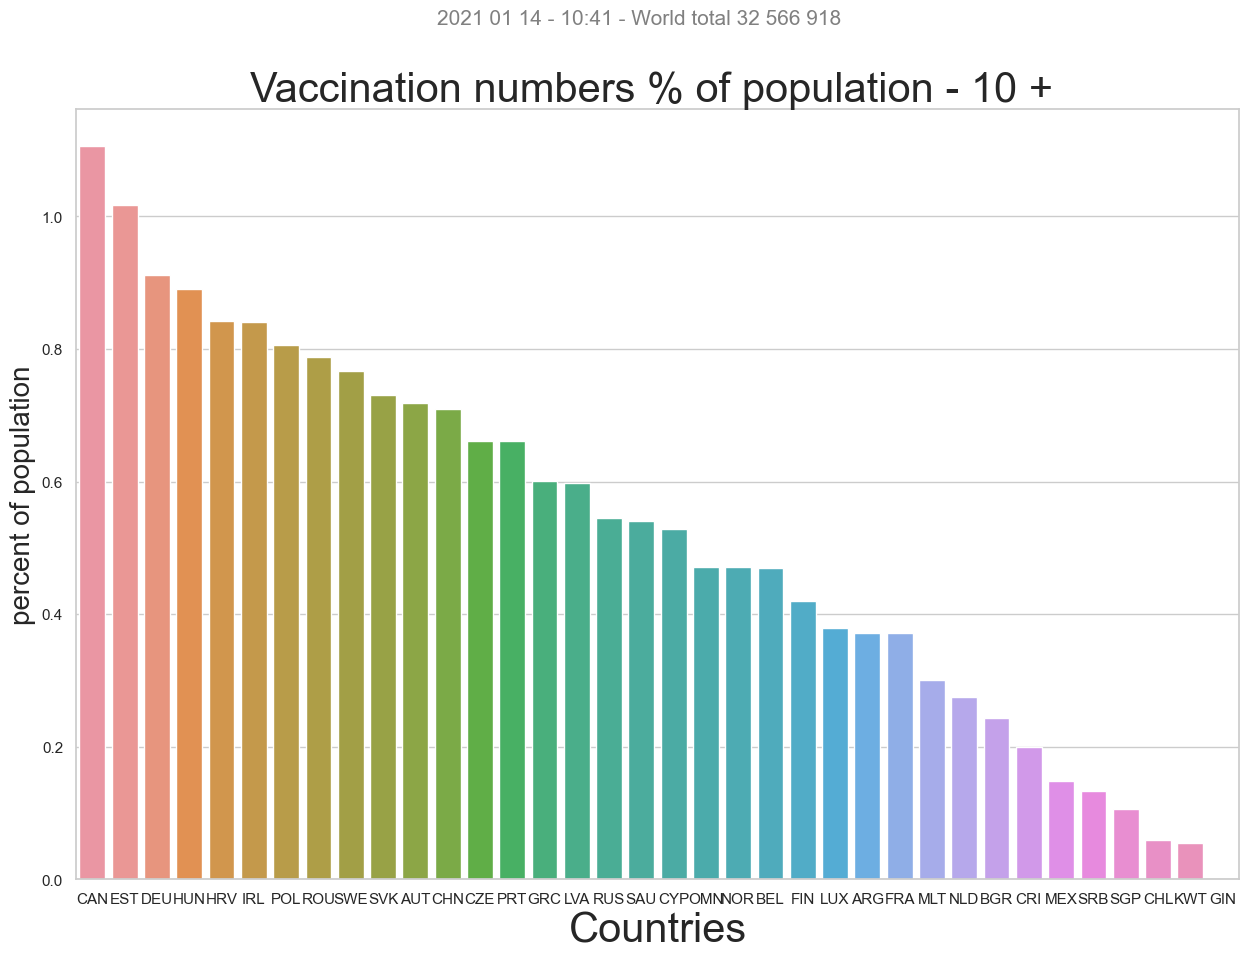

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

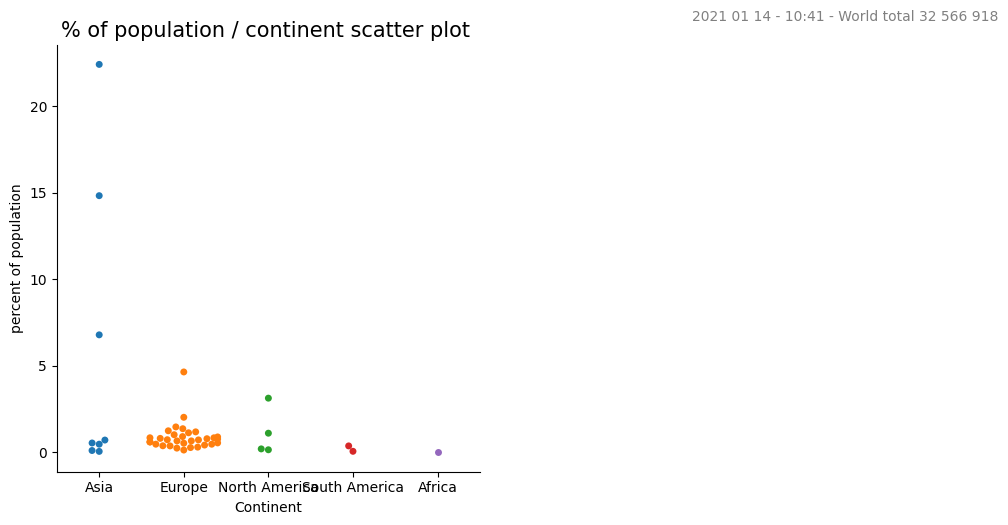

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

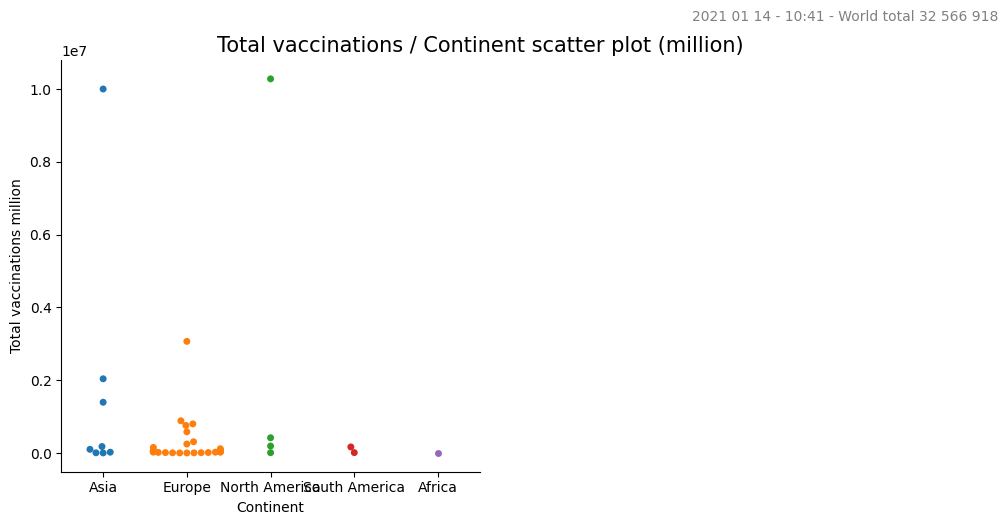

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

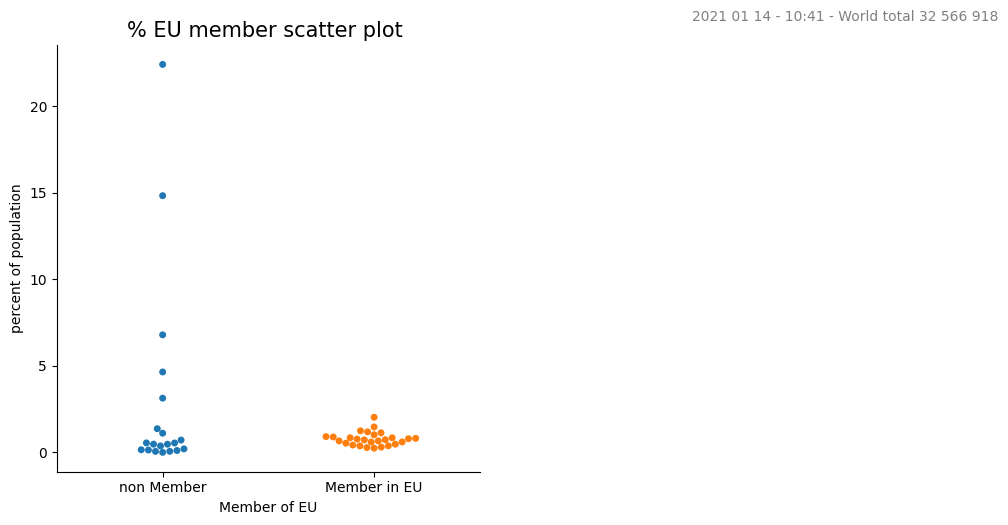

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

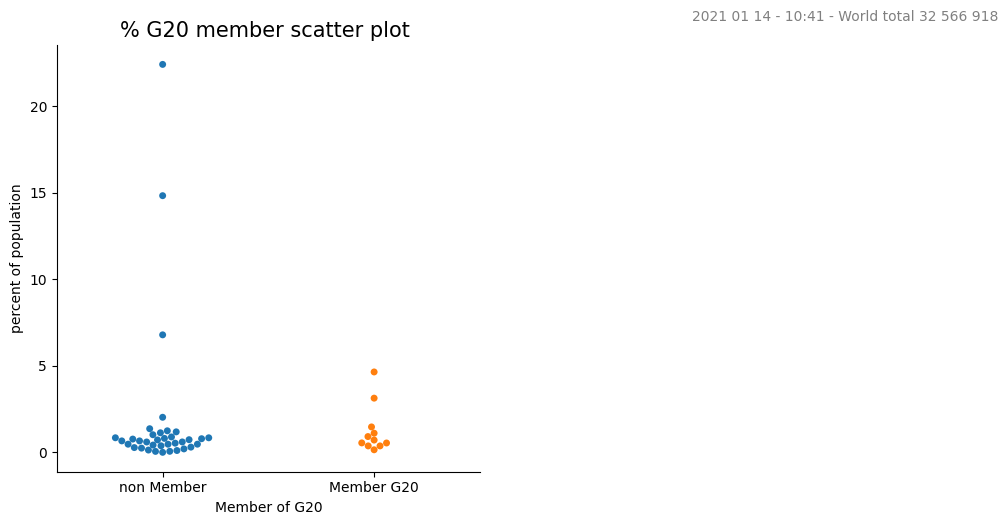

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

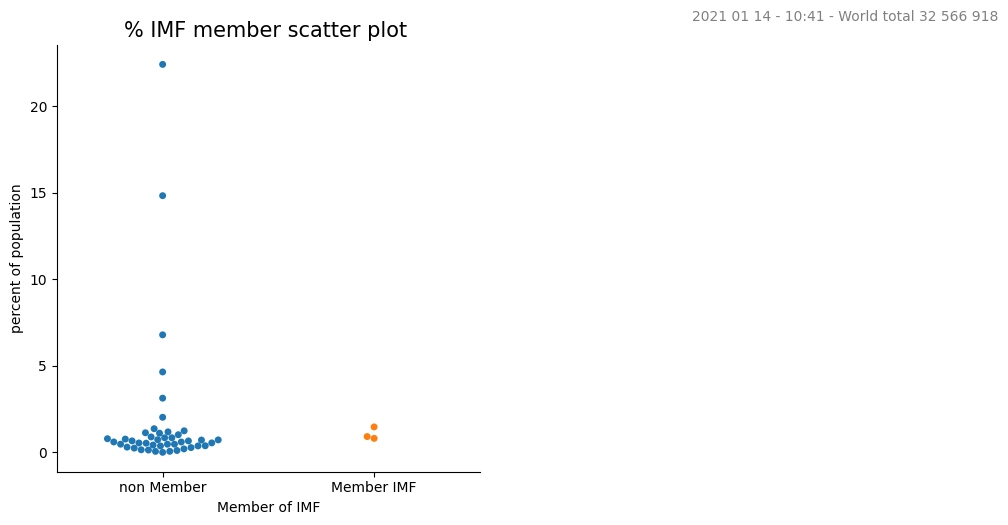

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


32 566 918 (48, 3) 7 742 111


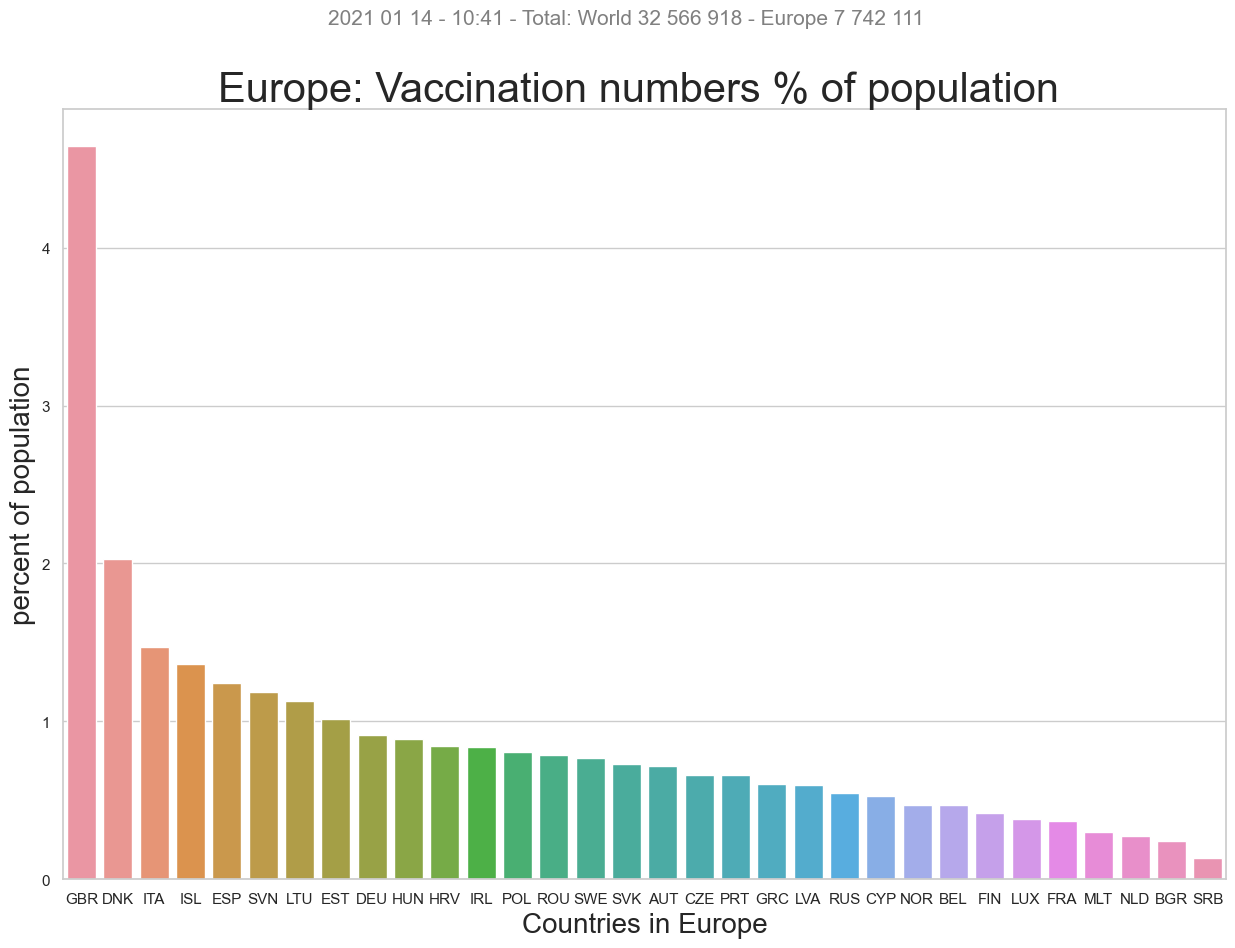

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

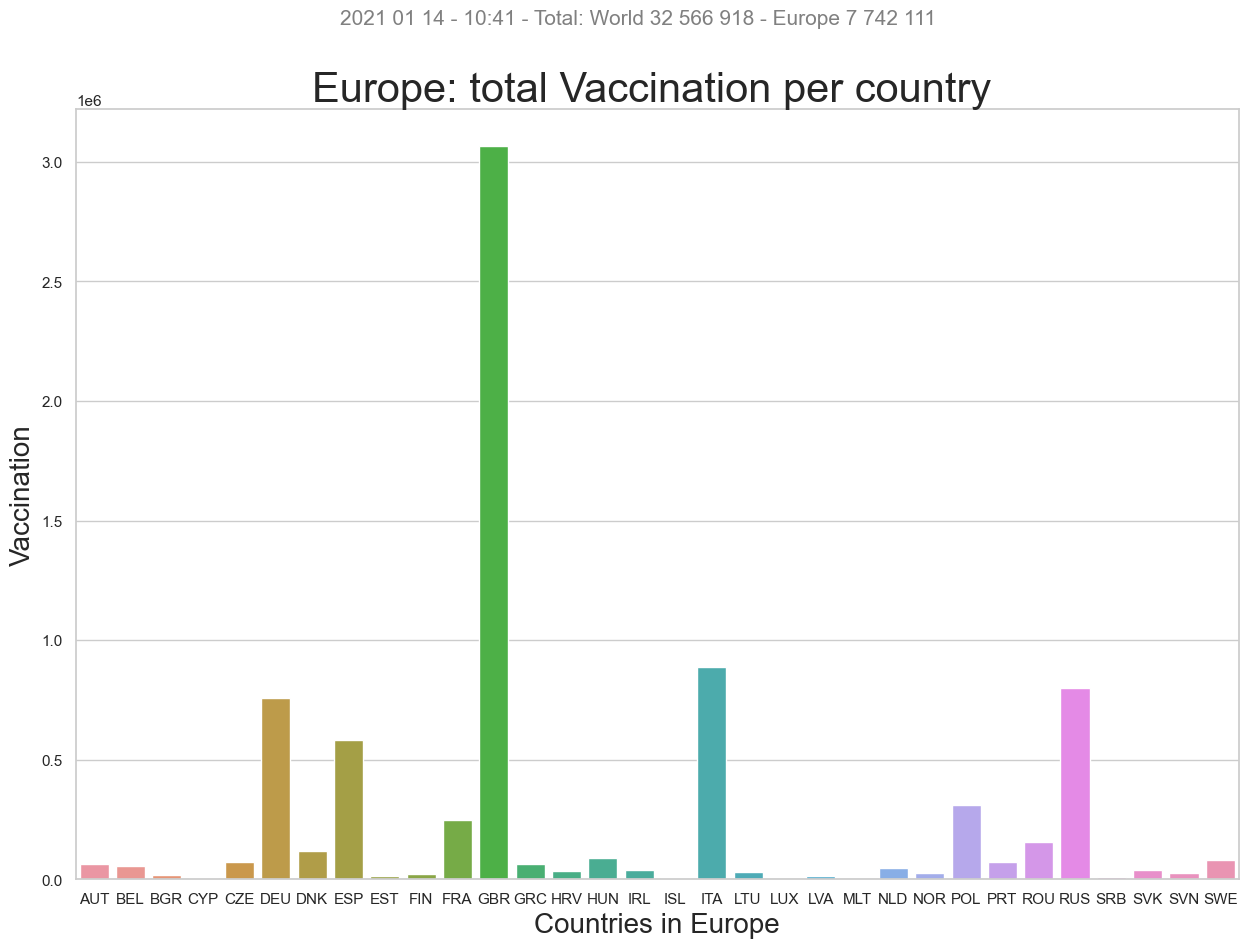

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,head_gender,total_vaccinations,memberEU,country_x,ISO3166_1,vaccinations_population_percent
36,male,0.0,non Member,Albania,ALB,0.000000
10,male,0.0,non Member,Andorra,AND,0.000000
25,male,0.0,non Member,Armenia,ARM,0.000000
8,male,63280.0,Member in EU,Austria,AUT,0.718339
29,male,0.0,non Member,Azerbaijan,AZE,0.000000
24,male,53726.0,Member in EU,Belgium,BEL,0.469986
22,male,17038.0,Member in EU,Bulgaria,BGR,0.243399
32,male,0.0,non Member,Bosnia and Herzegovina,BIH,0.000000
39,male,0.0,non Member,Belarus,BLR,0.000000
3,male,0.0,non Member,Switzerland,CHE,0.000000


## All countries on continent Europe

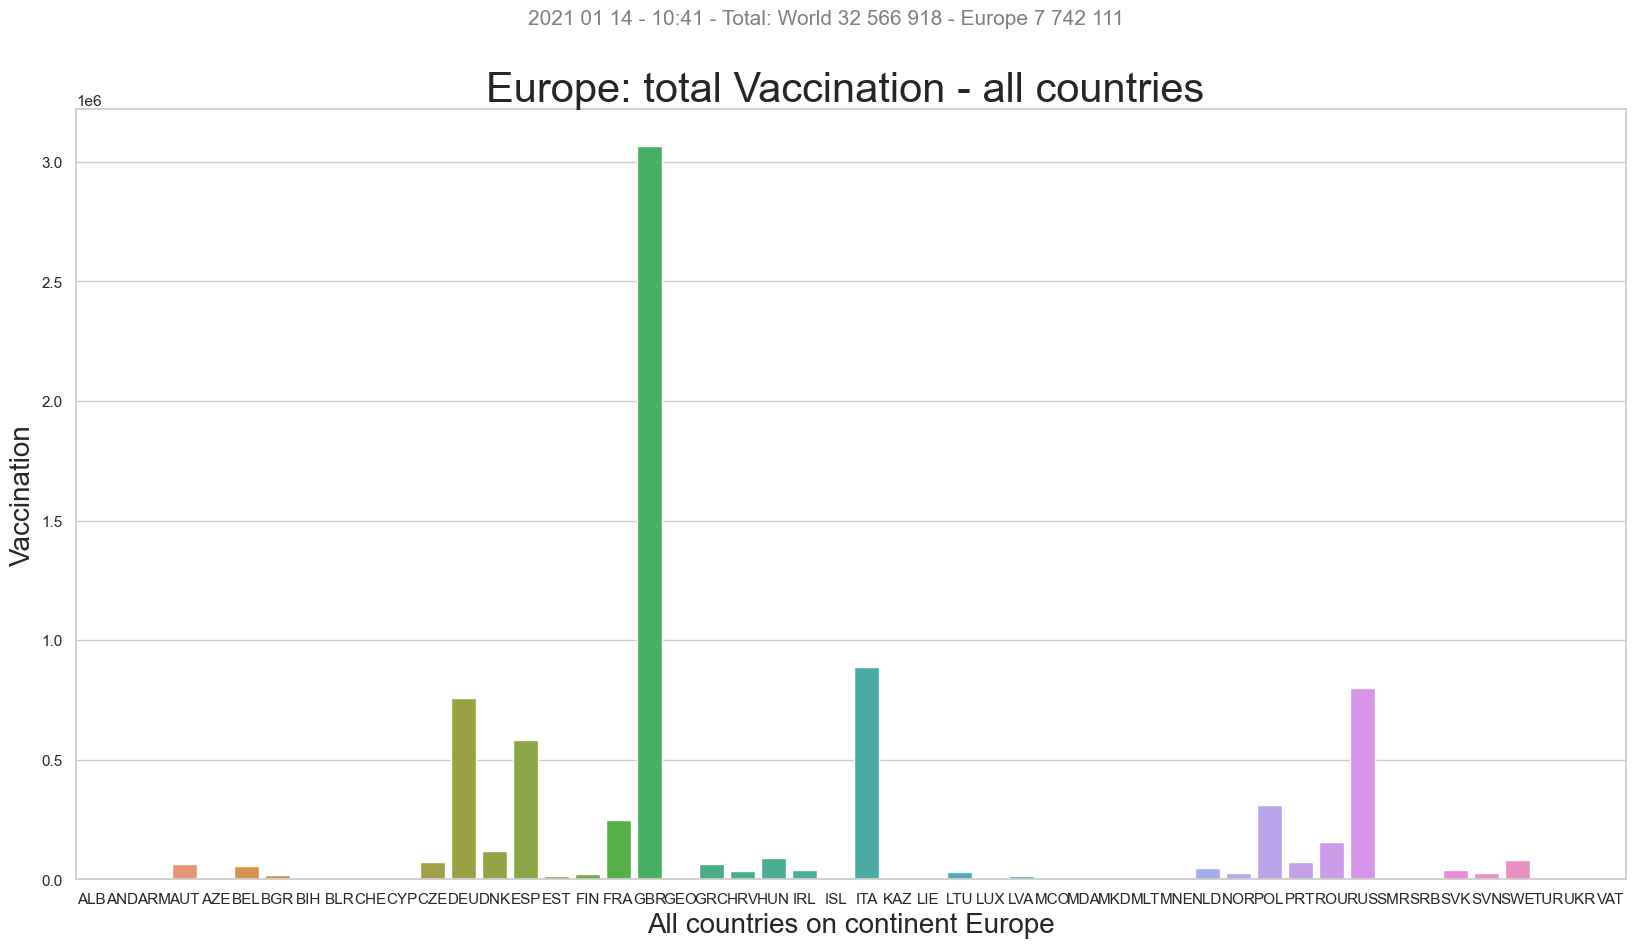

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   head_gender                      50 non-null     object 
 1   total_vaccinations               50 non-null     float64
 2   memberEU                         50 non-null     object 
 3   country_x                        50 non-null     object 
 4   ISO3166_1                        50 non-null     object 
 5   vaccinations_population_percent  50 non-null     float64
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [49]:
CountriesDataEuropeAll


,head_gender,total_vaccinations,memberEU,country_x,ISO3166_1,vaccinations_population_percent
36,male,0.0,non Member,Albania,ALB,0.000000
10,male,0.0,non Member,Andorra,AND,0.000000
25,male,0.0,non Member,Armenia,ARM,0.000000
8,male,63280.0,Member in EU,Austria,AUT,0.718339
29,male,0.0,non Member,Azerbaijan,AZE,0.000000
24,male,53726.0,Member in EU,Belgium,BEL,0.469986
22,male,17038.0,Member in EU,Bulgaria,BGR,0.243399
32,male,0.0,non Member,Bosnia and Herzegovina,BIH,0.000000
39,male,0.0,non Member,Belarus,BLR,0.000000
3,male,0.0,non Member,Switzerland,CHE,0.000000


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

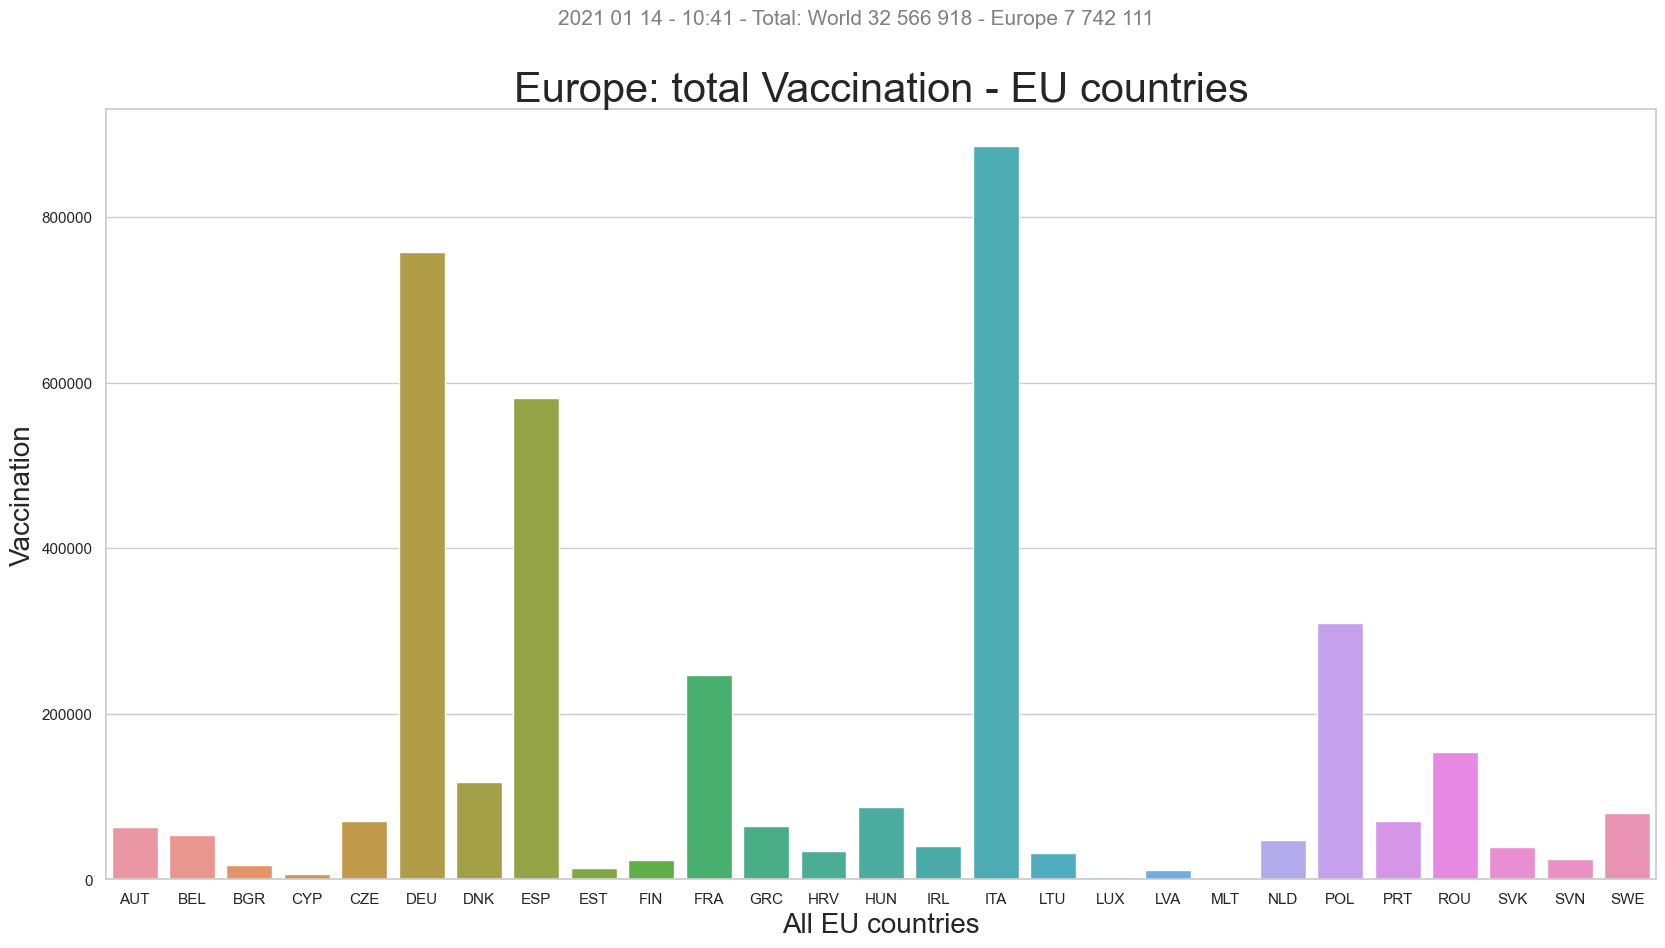

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

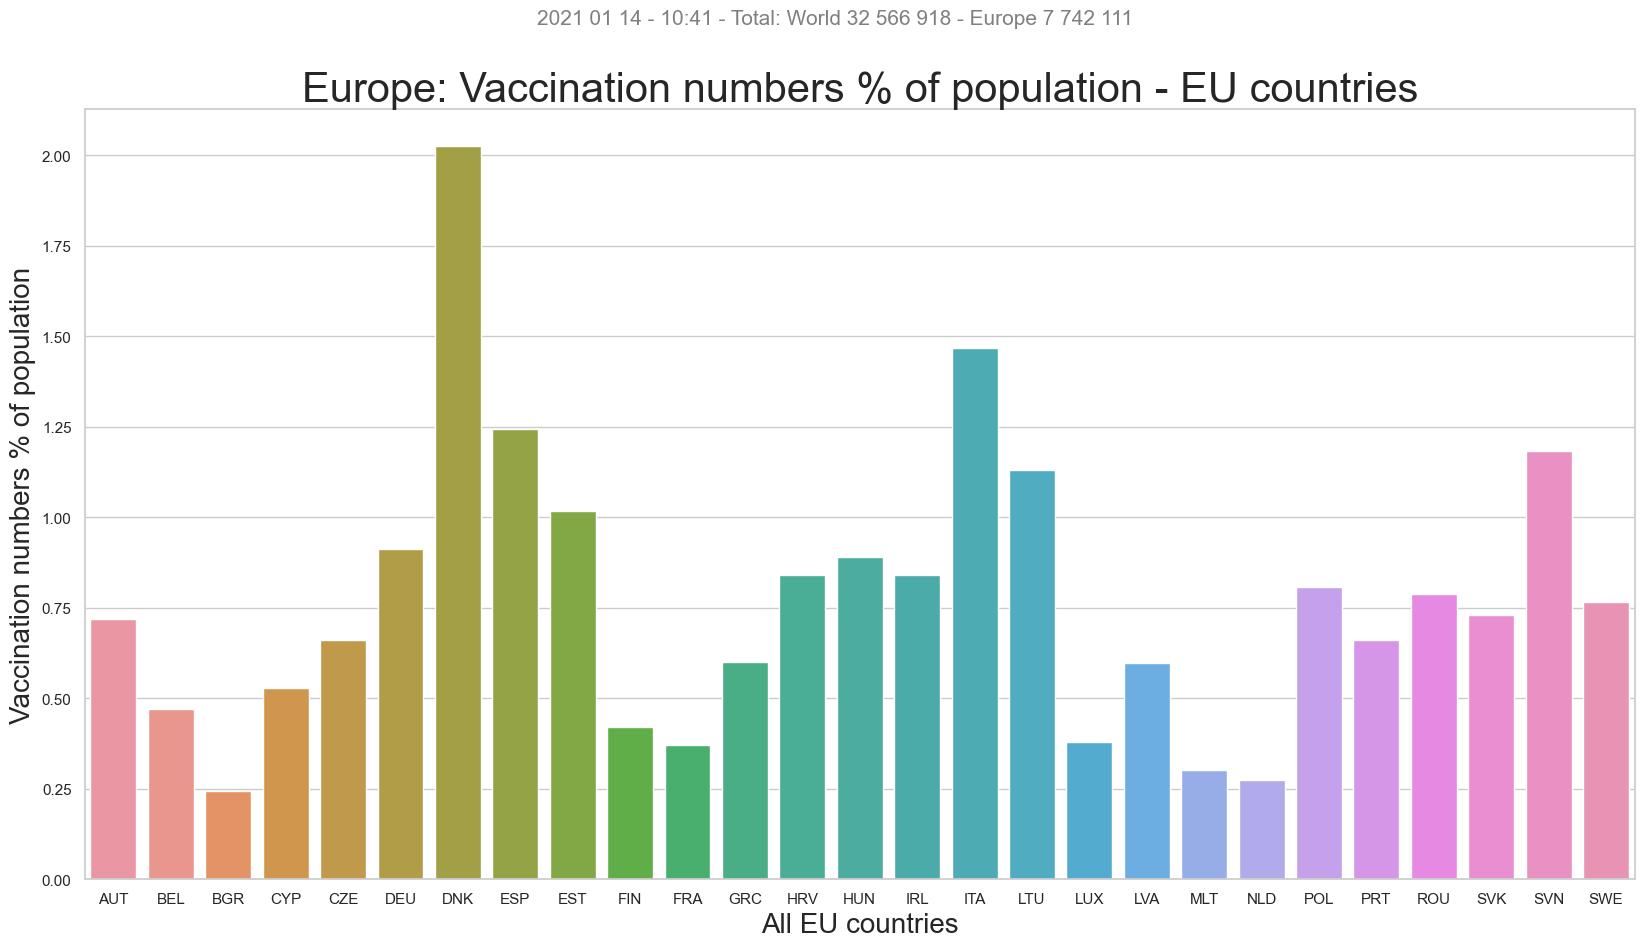

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,head_gender,total_vaccinations,memberEU,country,ISO3166-1,vaccinations_population_percent
8,male,63280.0,Member in EU,Austria,AUT,0.718339
24,male,53726.0,Member in EU,Belgium,BEL,0.469986
22,male,17038.0,Member in EU,Bulgaria,BGR,0.243399
37,male,6035.0,Member in EU,Cyprus,CYP,0.528845
42,male,70680.0,Member in EU,Czech Republic,CZE,0.660935
31,female,758093.0,Member in EU,Germany,DEU,0.911725
14,female,118073.0,Member in EU,Denmark,DNK,2.026148
0,male,581638.0,Member in EU,Spain,ESP,1.244597
44,male,13481.0,Member in EU,Estonia,EST,1.017572
9,female,23126.0,Member in EU,Finland,FIN,0.420393


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,memberEU,total_vaccinations,country,ISO3166-1


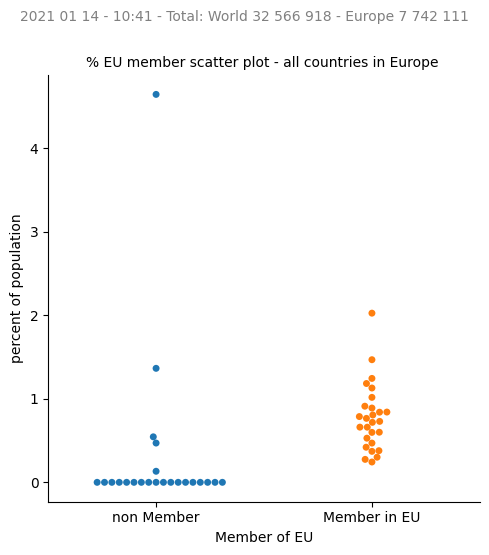

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   head_gender                      50 non-null     object 
 1   total_vaccinations               50 non-null     float64
 2   memberEU                         50 non-null     object 
 3   country                          50 non-null     object 
 4   ISO3166-1                        50 non-null     object 
 5   vaccinations_population_percent  50 non-null     float64
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

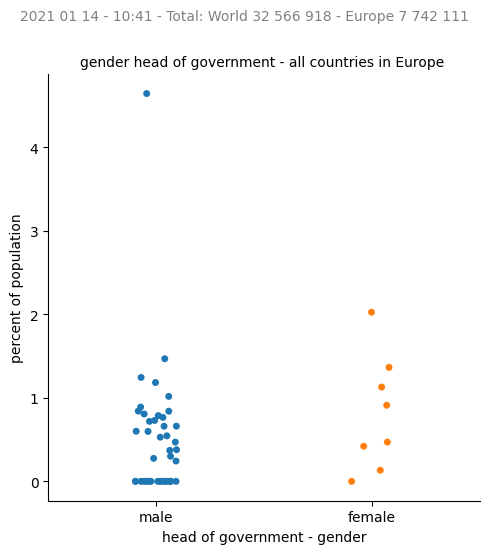

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

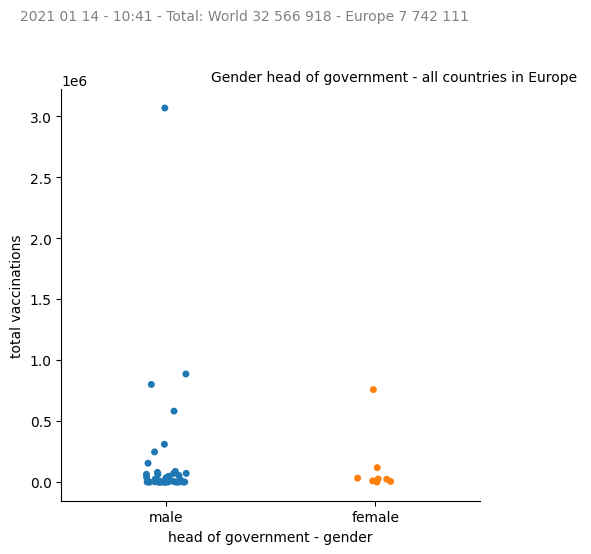

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

32 566 918 (48, 3) 7 742 111 (32, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 10:41:40.679614
Time elapsed (hh:mm:ss.ms) 0:00:31.101747


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)